In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

In [30]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

In [31]:
print("EJERCICIO 4: REDUCCIÓN DE DIMENSIONALIDAD - IRIS")

EJERCICIO 4: REDUCCIÓN DE DIMENSIONALIDAD - IRIS


In [32]:
print("\n 1 Cargando dataset...")
df = pd.read_csv(r"C:\Users\yanny\Downloads\Iris.csv")

print(f" Dataset cargado exitosamente")
print(f"  - Filas: {df.shape[0]}")
print(f"  - Columnas: {df.shape[1]}")


 1 Cargando dataset...
 Dataset cargado exitosamente
  - Filas: 150
  - Columnas: 6


In [33]:
print("\n 2 Exploración inicial de datos")
print("\nPrimeras 5 filas:")
display(df.head())

print("\nÚltimas 5 filas:")
display(df.tail())

print("\nInformación del dataset:")
df.info()

print("\nEstadísticas descriptivas:")
display(df.describe())

print("\nDistribución de especies:")
print(df['species'].value_counts())

print("\nValores nulos:")
print(df.isnull().sum())


 2 Exploración inicial de datos

Primeras 5 filas:


,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa



Últimas 5 filas:


,Id,sepal_length,sepal_width,petal_length,petal_width,species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB

Estadísticas descriptivas:


,Id,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000



Distribución de especies:
species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Valores nulos:
Id              0
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64



 3 Análisis Exploratorio de Datos


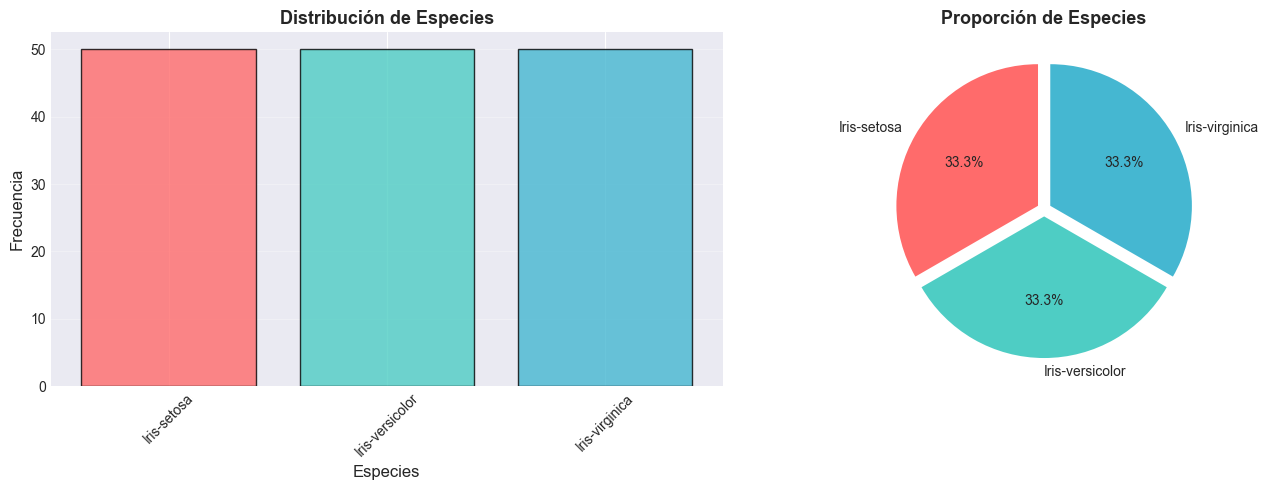

In [34]:
print("\n 3 Análisis Exploratorio de Datos")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

species_counts = df['species'].value_counts()
colors_species = ['#FF6B6B', '#4ECDC4', '#45B7D1']

axes[0].bar(species_counts.index, species_counts.values, color=colors_species, 
            edgecolor='black', alpha=0.8)
axes[0].set_xlabel('Especies', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].set_title('Distribución de Especies', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].tick_params(axis='x', rotation=45)

axes[1].pie(species_counts.values, labels=species_counts.index, autopct='%1.1f%%',
            colors=colors_species, startangle=90, explode=(0.05, 0.05, 0.05))
axes[1].set_title('Proporción de Especies', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

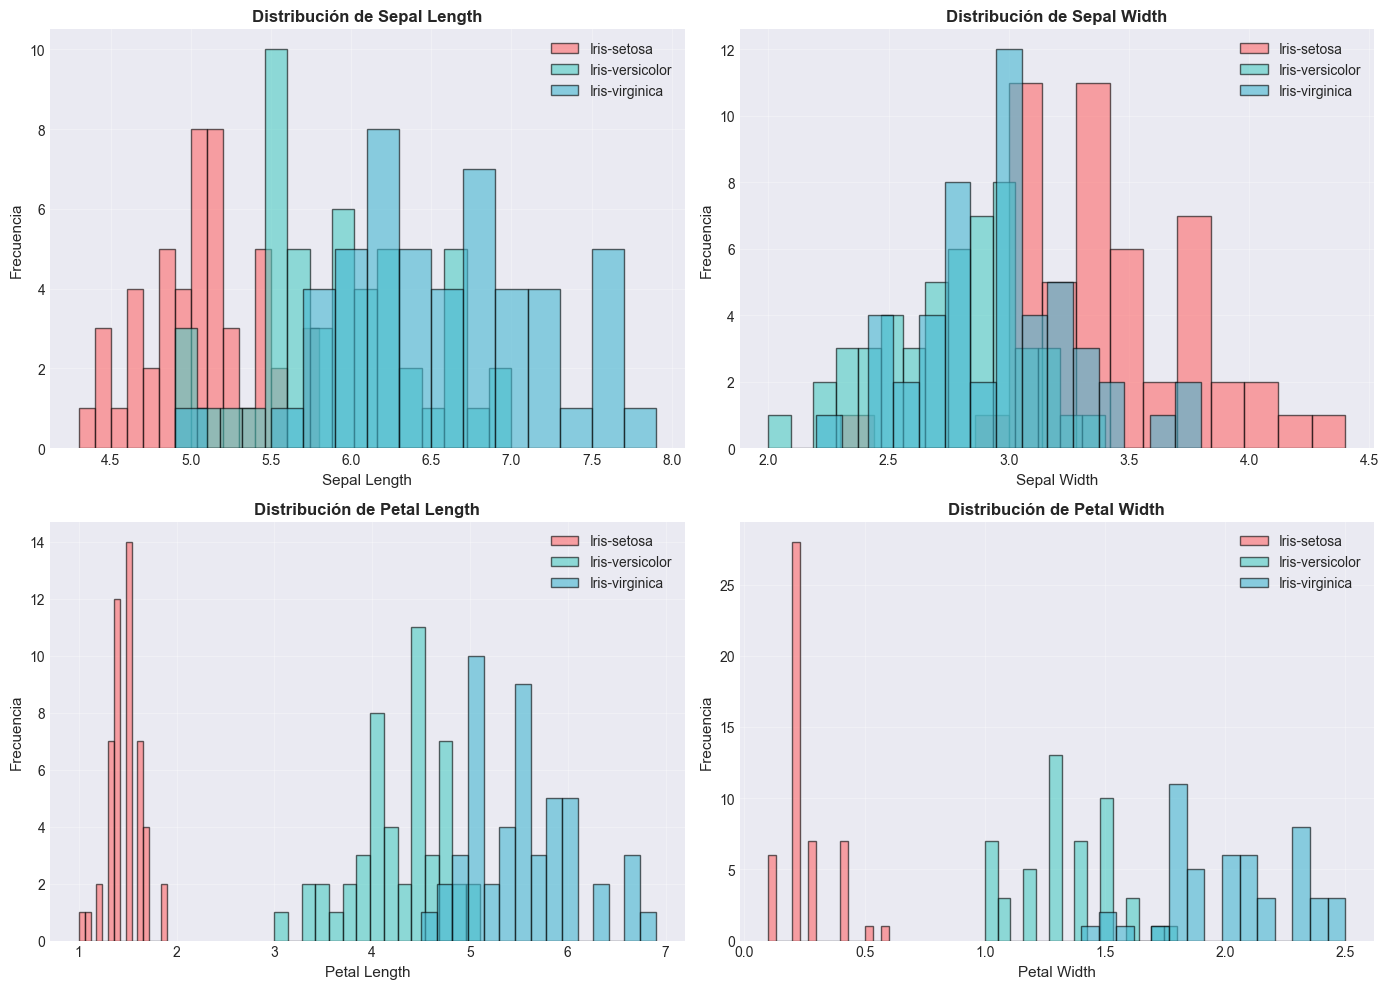

In [35]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, feature in enumerate(features):
    for species, color in zip(df['species'].unique(), colors_species):
        data = df[df['species'] == species][feature]
        axes[idx].hist(data, bins=15, alpha=0.6, label=species, color=color, edgecolor='black')
    
    axes[idx].set_xlabel(feature.replace('_', ' ').title(), fontsize=11)
    axes[idx].set_ylabel('Frecuencia', fontsize=11)
    axes[idx].set_title(f'Distribución de {feature.replace("_", " ").title()}', 
                       fontsize=12, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

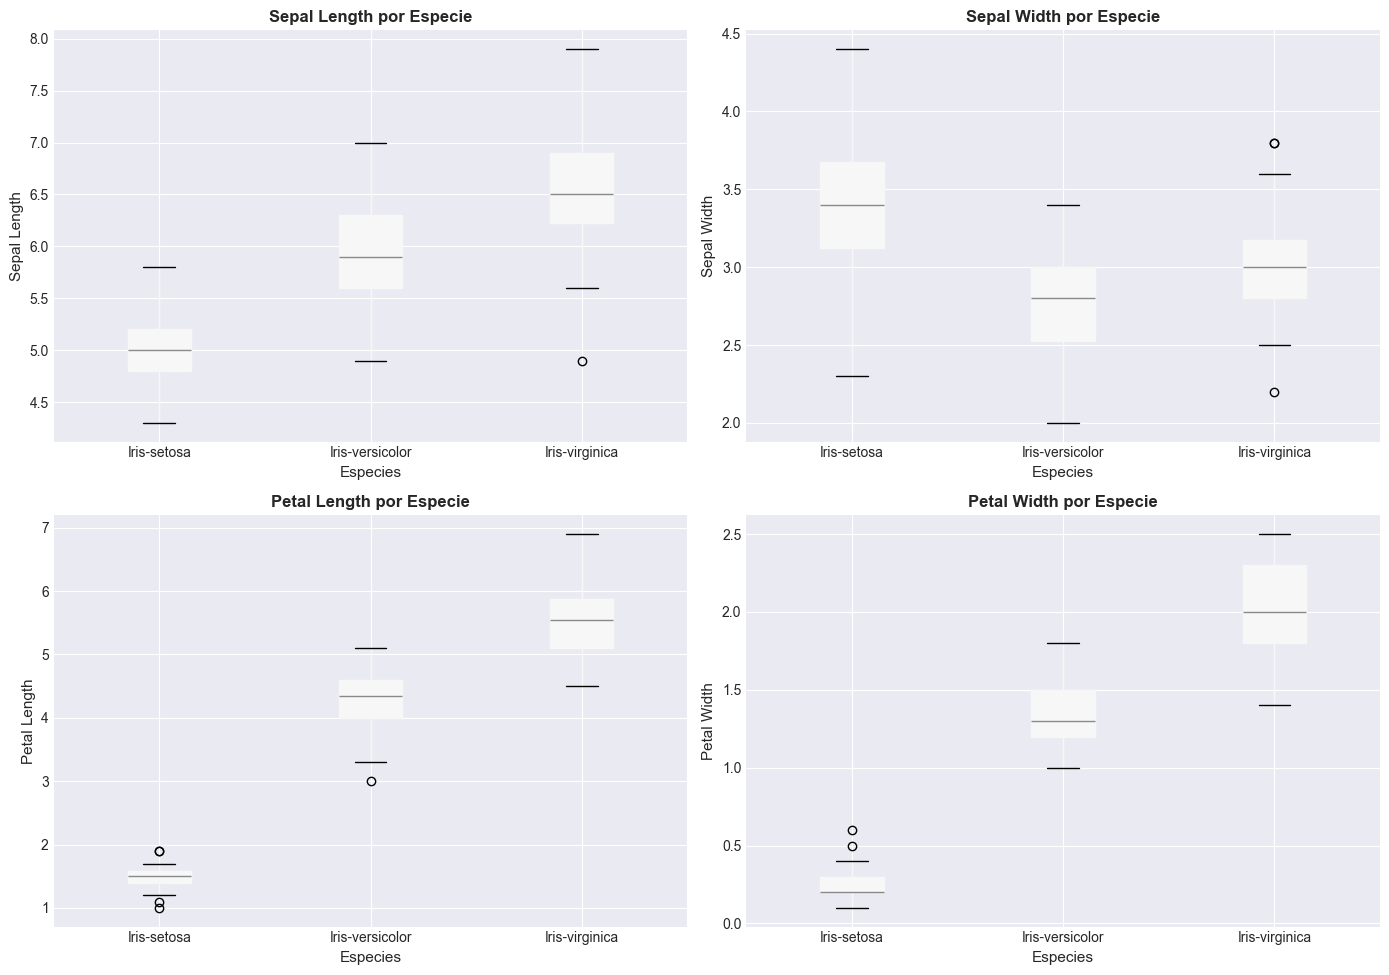

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, feature in enumerate(features):
    df.boxplot(column=feature, by='species', ax=axes[idx], patch_artist=True)
    axes[idx].set_xlabel('Especies', fontsize=11)
    axes[idx].set_ylabel(feature.replace('_', ' ').title(), fontsize=11)
    axes[idx].set_title(f'{feature.replace("_", " ").title()} por Especie', 
                       fontsize=12, fontweight='bold')
    axes[idx].get_figure().suptitle('')

plt.tight_layout()
plt.show()


 4 Matriz de Correlación


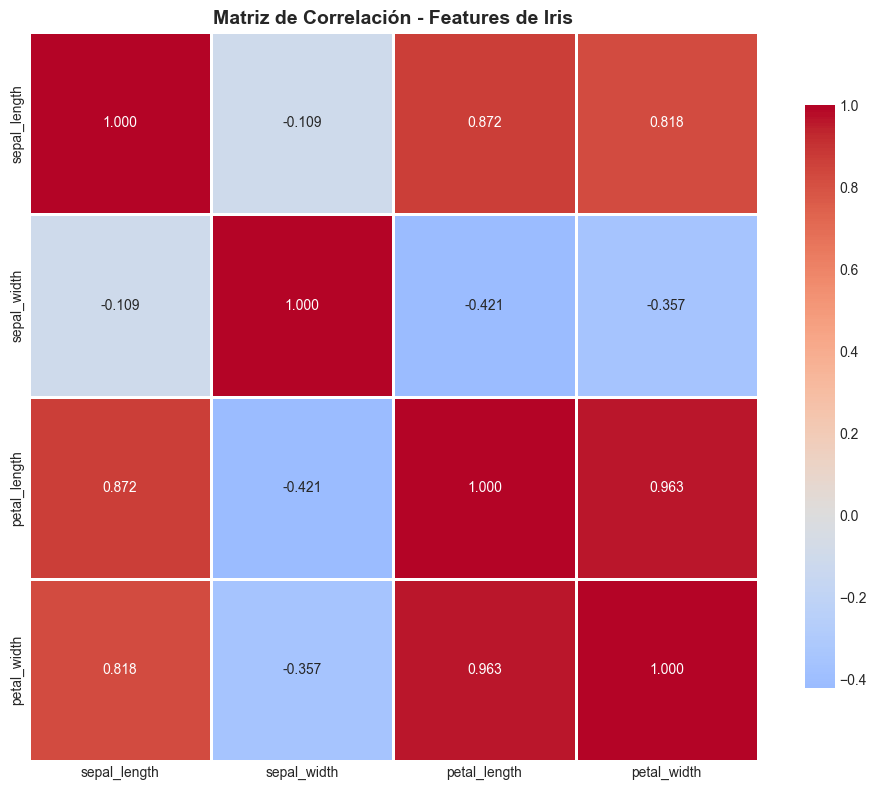


Correlaciones encontradas:


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [37]:
# Matriz de correlación
print("\n 4 Matriz de Correlación")

plt.figure(figsize=(10, 8))
correlation_matrix = df[features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm',
            square=True, linewidths=2, center=0, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Features de Iris', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nCorrelaciones encontradas:")
display(correlation_matrix)

In [38]:
print("\n 5 Scatter Matrix - Relaciones entre Features")


 5 Scatter Matrix - Relaciones entre Features


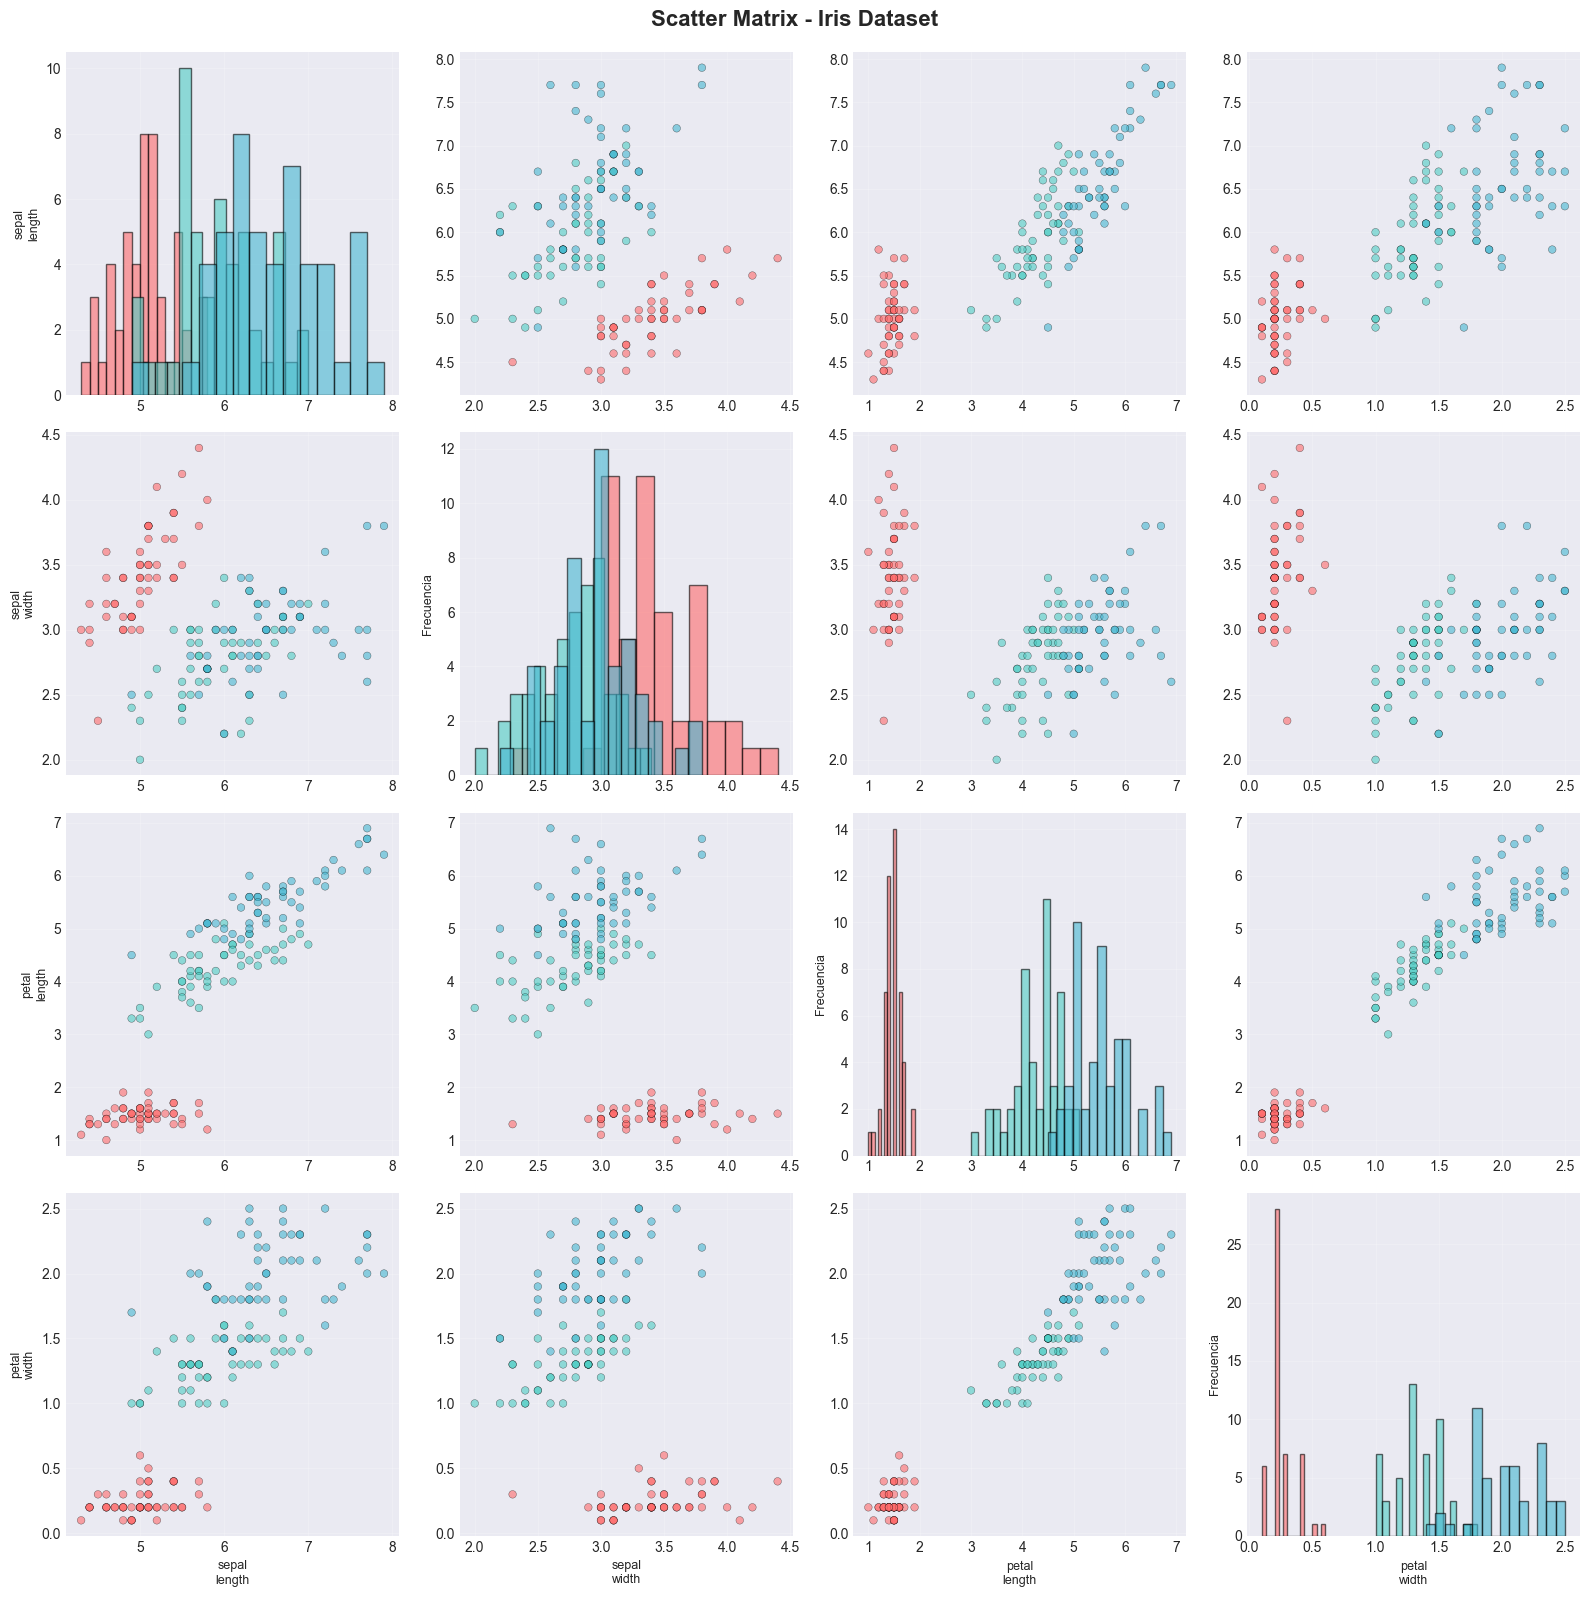

In [39]:
# Crear mapeo de colores para especies
species_map = {species: idx for idx, species in enumerate(df['species'].unique())}
colors_mapped = [colors_species[species_map[s]] for s in df['species']]

fig, axes = plt.subplots(4, 4, figsize=(16, 16))

for i in range(4):
    for j in range(4):
        ax = axes[i, j]
        
        if i == j:
            # Diagonal: histogramas
            for species, color in zip(df['species'].unique(), colors_species):
                data = df[df['species'] == species][features[i]]
                ax.hist(data, bins=15, alpha=0.6, color=color, edgecolor='black')
            ax.set_ylabel('Frecuencia', fontsize=9)
        else:
            # Fuera diagonal: scatter plots
            ax.scatter(df[features[j]], df[features[i]], 
                      c=colors_mapped, alpha=0.6, s=30, edgecolors='black', linewidth=0.3)
        
        if i == 3:
            ax.set_xlabel(features[j].replace('_', '\n'), fontsize=9)
        if j == 0:
            ax.set_ylabel(features[i].replace('_', '\n'), fontsize=9)
        
        ax.grid(True, alpha=0.2)

plt.suptitle('Scatter Matrix - Iris Dataset', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

In [40]:
# 6. PREPARACIÓN DE DATOS
print("\n" + "=" * 60)
print(" 6 PREPARACIÓN DE DATOS PARA PCA")

X = df[features].values
y = df['species'].values

print(f"\nDimensiones originales:")
print(f"  Features (X): {X.shape}")
print(f"  Target (y): {y.shape}")
print(f"  Número de dimensiones: {X.shape[1]}")


 6 PREPARACIÓN DE DATOS PARA PCA

Dimensiones originales:
  Features (X): (150, 4)
  Target (y): (150,)
  Número de dimensiones: 4


In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n Datos normalizados con StandardScaler")
print(f"\nEstadísticas después de normalización:")
print(f"  Media por feature: {X_scaled.mean(axis=0)}")
print(f"  Desv. estándar por feature: {X_scaled.std(axis=0)}")


 Datos normalizados con StandardScaler

Estadísticas después de normalización:
  Media por feature: [-4.73695157e-16 -6.63173220e-16  3.31586610e-16 -2.84217094e-16]
  Desv. estándar por feature: [1. 1. 1. 1.]


In [42]:
# 7. ANÁLISIS DE VARIANZA 
print("\n" + "=" * 60)
print(" 7 ANÁLISIS DE VARIANZA EXPLICADA")

# PCA con todos los componentes
pca_full = PCA()
pca_full.fit(X_scaled)

varianza_explicada = pca_full.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)

print("\nVarianza explicada por cada componente:")
for i, (var, cum_var) in enumerate(zip(varianza_explicada, varianza_acumulada)):
    print(f"  PC{i+1}: {var*100:.2f}% (Acumulada: {cum_var*100:.2f}%)")


 7 ANÁLISIS DE VARIANZA EXPLICADA

Varianza explicada por cada componente:
  PC1: 72.77% (Acumulada: 72.77%)
  PC2: 23.03% (Acumulada: 95.80%)
  PC3: 3.68% (Acumulada: 99.48%)
  PC4: 0.52% (Acumulada: 100.00%)


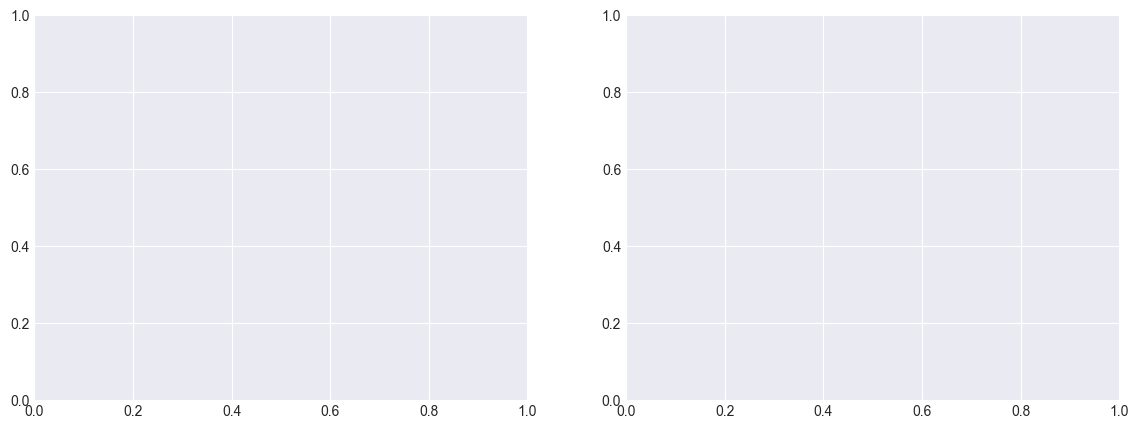

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

In [44]:
# Gráfica 1: Varianza por componente
axes[0].bar(range(1, len(varianza_explicada) + 1), varianza_explicada * 100,
            color='steelblue', edgecolor='black', alpha=0.8)
axes[0].set_xlabel('Componente Principal', fontsize=12)
axes[0].set_ylabel('Varianza Explicada (%)', fontsize=12)
axes[0].set_title('Varianza Explicada por Componente', fontsize=13, fontweight='bold')
axes[0].set_xticks(range(1, len(varianza_explicada) + 1))
axes[0].grid(True, alpha=0.3, axis='y')

In [45]:
# Gráfica 2: Varianza acumulada
axes[1].plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada * 100,
             'o-', linewidth=2, markersize=10, color='darkgreen')
axes[1].axhline(y=95, color='r', linestyle='--', linewidth=2, label='95% varianza')
axes[1].axhline(y=90, color='orange', linestyle='--', linewidth=2, label='90% varianza')
axes[1].set_xlabel('Número de Componentes', fontsize=12)
axes[1].set_ylabel('Varianza Explicada Acumulada (%)', fontsize=12)
axes[1].set_title('Varianza Acumulada (Scree Plot)', fontsize=13, fontweight='bold')
axes[1].set_xticks(range(1, len(varianza_acumulada) + 1))
axes[1].set_ylim([0, 105])
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [46]:
# 8. JUSTIFICACIÓN DEL NÚMERO DE COMPONENTES
print("\n" + "=" * 60)
print(" 8 JUSTIFICACIÓN DEL NÚMERO DE COMPONENTES")

# Determinar número óptimo
n_components_95 = np.argmax(varianza_acumulada >= 0.95) + 1
n_components_90 = np.argmax(varianza_acumulada >= 0.90) + 1

print(f"""
 ANÁLISIS DE COMPONENTES:

1. Para capturar el 90% de la varianza: {n_components_90} componentes
   → Varianza real: {varianza_acumulada[n_components_90-1]*100:.2f}%

2. Para capturar el 95% de la varianza: {n_components_95} componentes
   → Varianza real: {varianza_acumulada[n_components_95-1]*100:.2f}%

3. Los primeros 2 componentes explican: {varianza_acumulada[1]*100:.2f}%
   → Suficiente para visualización 2D

4. Los primeros 3 componentes explican: {varianza_acumulada[2]*100:.2f}%
   → Excelente para visualización 3D

 DECISIÓN: Usaremos 2 componentes para visualización 2D
   → Pérdida de información: {(100 - varianza_acumulada[1]*100):.2f}%
   → Balance óptimo entre reducción dimensional y preservación de información
""")

n_components_optimo = 2
print(f"\n Número de componentes seleccionado: {n_components_optimo}")



 8 JUSTIFICACIÓN DEL NÚMERO DE COMPONENTES

 ANÁLISIS DE COMPONENTES:

1. Para capturar el 90% de la varianza: 2 componentes
   → Varianza real: 95.80%

2. Para capturar el 95% de la varianza: 2 componentes
   → Varianza real: 95.80%

3. Los primeros 2 componentes explican: 95.80%
   → Suficiente para visualización 2D

4. Los primeros 3 componentes explican: 99.48%
   → Excelente para visualización 3D

 DECISIÓN: Usaremos 2 componentes para visualización 2D
   → Pérdida de información: 4.20%
   → Balance óptimo entre reducción dimensional y preservación de información


 Número de componentes seleccionado: 2


In [47]:
print("\n" + "=" * 60)
print(" 9 APLICACIÓN DE PCA CON 2 COMPONENTES")


 9 APLICACIÓN DE PCA CON 2 COMPONENTES


In [48]:
# PCA con 2 componentes
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

print(f"\n PCA aplicado exitosamente")
print(f"  Dimensiones originales: {X_scaled.shape}")
print(f"  Dimensiones reducidas: {X_pca_2d.shape}")
print(f"  Reducción: {X_scaled.shape[1]} → {X_pca_2d.shape[1]} dimensiones")

print(f"\nVarianza explicada:")
print(f"  PC1: {pca_2d.explained_variance_ratio_[0]*100:.2f}%")
print(f"  PC2: {pca_2d.explained_variance_ratio_[1]*100:.2f}%")
print(f"  Total: {sum(pca_2d.explained_variance_ratio_)*100:.2f}%")


✓ PCA aplicado exitosamente
  Dimensiones originales: (150, 4)
  Dimensiones reducidas: (150, 2)
  Reducción: 4 → 2 dimensiones

Varianza explicada:
  PC1: 72.77%
  PC2: 23.03%
  Total: 95.80%


In [49]:
print(f"\nComponentes Principales (Loadings):")
loadings_df = pd.DataFrame(
    pca_2d.components_.T,
    columns=['PC1', 'PC2'],
    index=features
)
display(loadings_df)


Componentes Principales (Loadings):


,PC1,PC2
sepal_length,0.522372,0.372318
sepal_width,-0.263355,0.925556
petal_length,0.581254,0.021095
petal_width,0.565611,0.065416


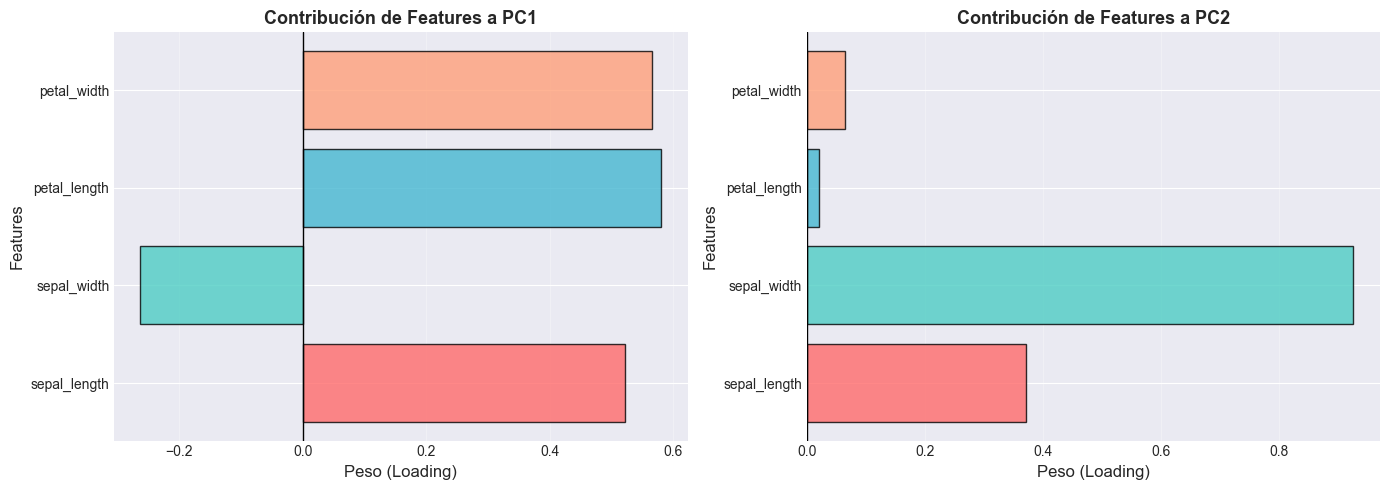

In [50]:
# Visualizar loadings
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for idx, pc in enumerate(['PC1', 'PC2']):
    axes[idx].barh(features, loadings_df[pc], color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'],
                   edgecolor='black', alpha=0.8)
    axes[idx].set_xlabel('Peso (Loading)', fontsize=12)
    axes[idx].set_ylabel('Features', fontsize=12)
    axes[idx].set_title(f'Contribución de Features a {pc}', fontsize=13, fontweight='bold')
    axes[idx].axvline(x=0, color='black', linewidth=1)
    axes[idx].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


 10 Visualización en 2D


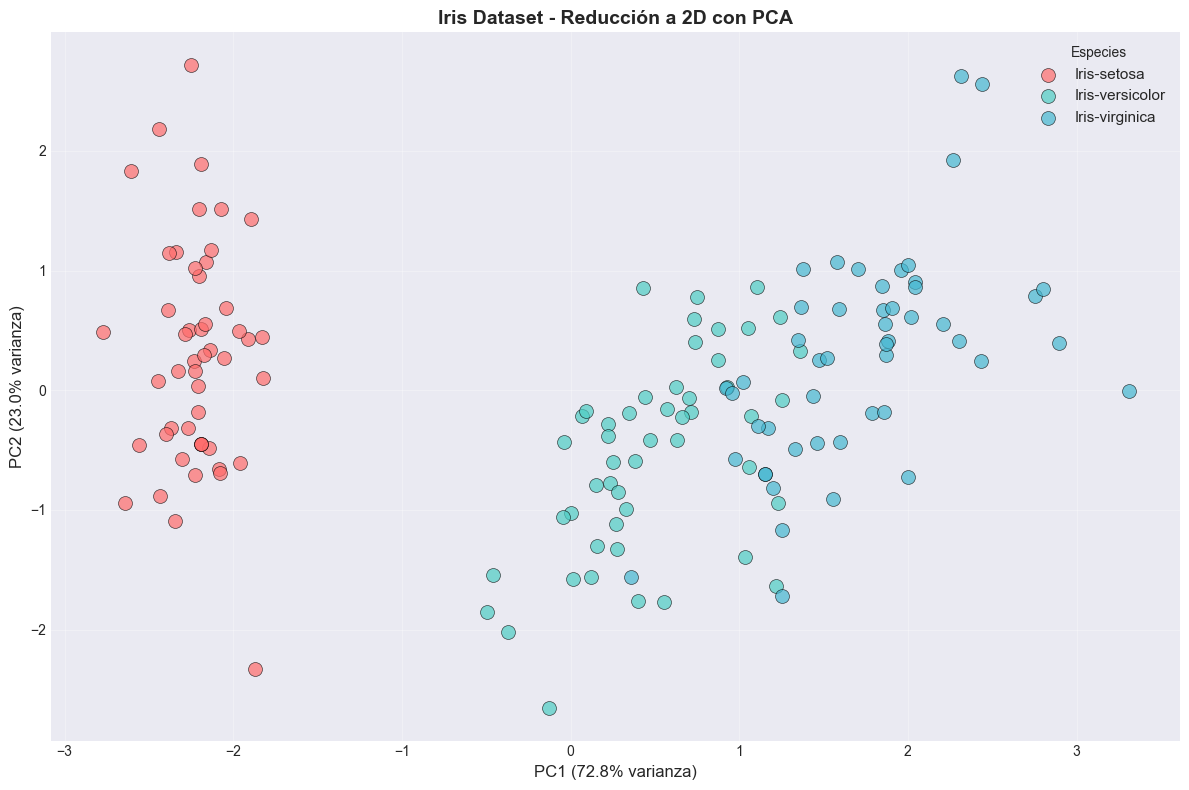

In [51]:
# 10. VISUALIZACIÓN 2D
print("\n 10 Visualización en 2D")

plt.figure(figsize=(12, 8))

for species, color in zip(df['species'].unique(), colors_species):
    mask = y == species
    plt.scatter(X_pca_2d[mask, 0], X_pca_2d[mask, 1],
                c=color, label=species, alpha=0.7, 
                edgecolors='black', linewidth=0.5, s=100)

plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}% varianza)', fontsize=12)
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}% varianza)', fontsize=12)
plt.title('Iris Dataset - Reducción a 2D con PCA', fontsize=14, fontweight='bold')
plt.legend(fontsize=11, title='Especies')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [52]:
print("\n 11 Comparación con 3 Componentes")

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

print(f"\n PCA con 3 componentes aplicado")
print(f"  Varianza explicada total: {sum(pca_3d.explained_variance_ratio_)*100:.2f}%")
print(f"  PC1: {pca_3d.explained_variance_ratio_[0]*100:.2f}%")
print(f"  PC2: {pca_3d.explained_variance_ratio_[1]*100:.2f}%")
print(f"  PC3: {pca_3d.explained_variance_ratio_[2]*100:.2f}%")


 11 Comparación con 3 Componentes

✓ PCA con 3 componentes aplicado
  Varianza explicada total: 99.48%
  PC1: 72.77%
  PC2: 23.03%
  PC3: 3.68%


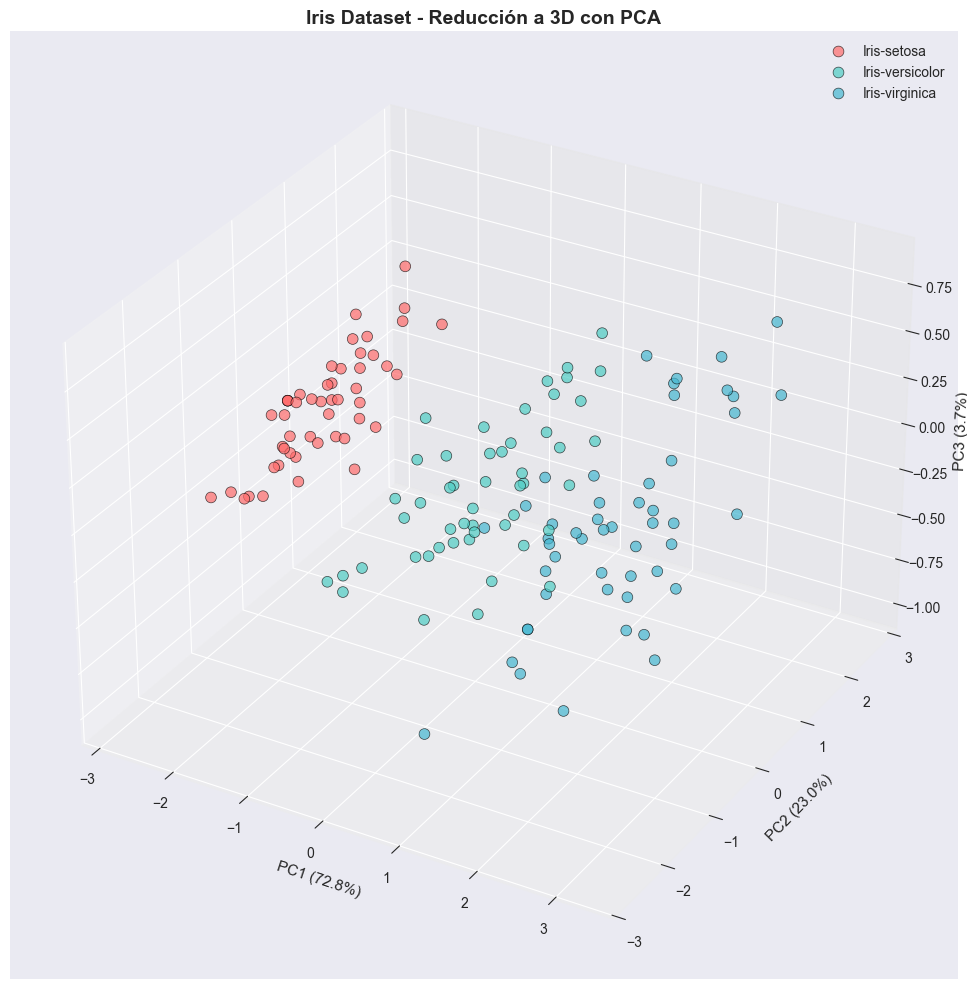

In [53]:
# Visualización 3D
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

for species, color in zip(df['species'].unique(), colors_species):
    mask = y == species
    ax.scatter(X_pca_3d[mask, 0], X_pca_3d[mask, 1], X_pca_3d[mask, 2],
               c=color, label=species, alpha=0.7, 
               edgecolors='black', linewidth=0.5, s=60)

ax.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]*100:.1f}%)', fontsize=11)
ax.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]*100:.1f}%)', fontsize=11)
ax.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]*100:.1f}%)', fontsize=11)
ax.set_title('Iris Dataset - Reducción a 3D con PCA', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
plt.tight_layout()
plt.show()


 12 Comparación Visual: 2D vs 3D


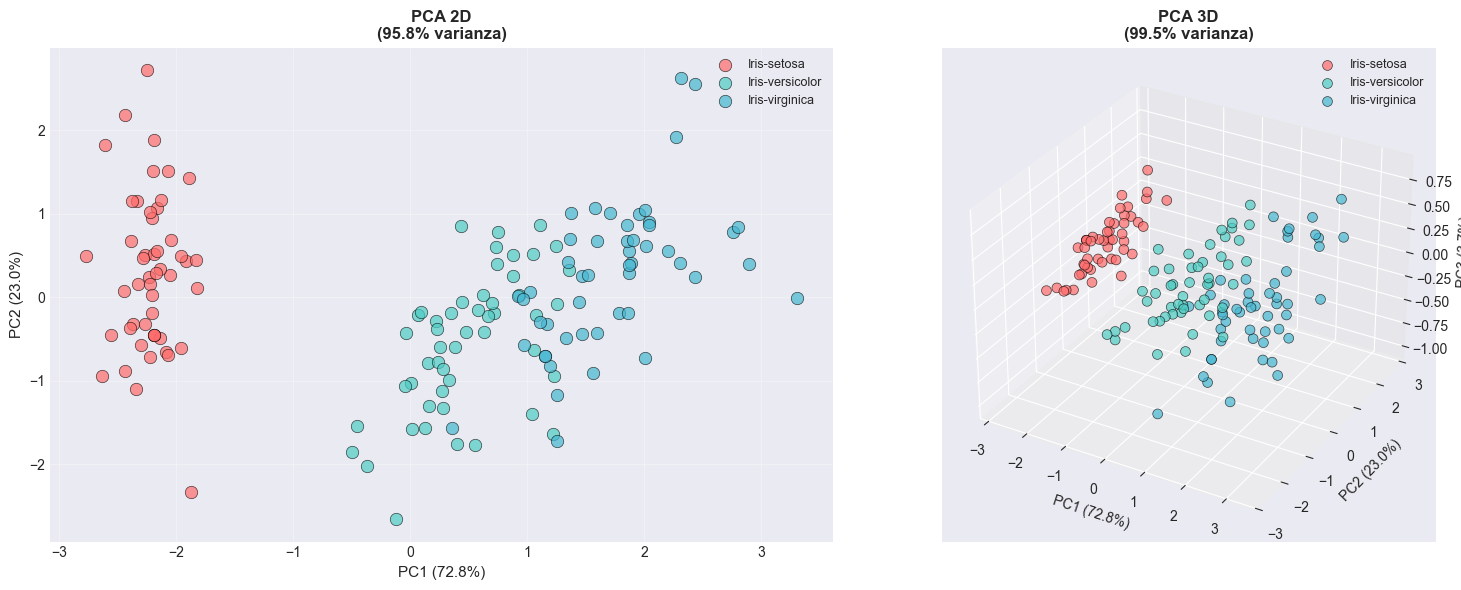

In [54]:
# 12. COMPARACIÓN VISUAL 2D vs 3D
print("\n 12 Comparación Visual: 2D vs 3D")

fig = plt.figure(figsize=(16, 6))

# Vista 2D
ax1 = fig.add_subplot(121)
for species, color in zip(df['species'].unique(), colors_species):
    mask = y == species
    ax1.scatter(X_pca_2d[mask, 0], X_pca_2d[mask, 1],
                c=color, label=species, alpha=0.7, 
                edgecolors='black', linewidth=0.5, s=80)
ax1.set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)', fontsize=11)
ax1.set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)', fontsize=11)
ax1.set_title(f'PCA 2D\n({sum(pca_2d.explained_variance_ratio_)*100:.1f}% varianza)', 
             fontsize=12, fontweight='bold')
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)

# Vista 3D
ax2 = fig.add_subplot(122, projection='3d')
for species, color in zip(df['species'].unique(), colors_species):
    mask = y == species
    ax2.scatter(X_pca_3d[mask, 0], X_pca_3d[mask, 1], X_pca_3d[mask, 2],
                c=color, label=species, alpha=0.7, 
                edgecolors='black', linewidth=0.5, s=50)
ax2.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]*100:.1f}%)', fontsize=10)
ax2.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]*100:.1f}%)', fontsize=10)
ax2.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]*100:.1f}%)', fontsize=10)
ax2.set_title(f'PCA 3D\n({sum(pca_3d.explained_variance_ratio_)*100:.1f}% varianza)', 
             fontsize=12, fontweight='bold')
ax2.legend(fontsize=9)

plt.tight_layout()
plt.show()


 13 Biplot - Features y Observaciones


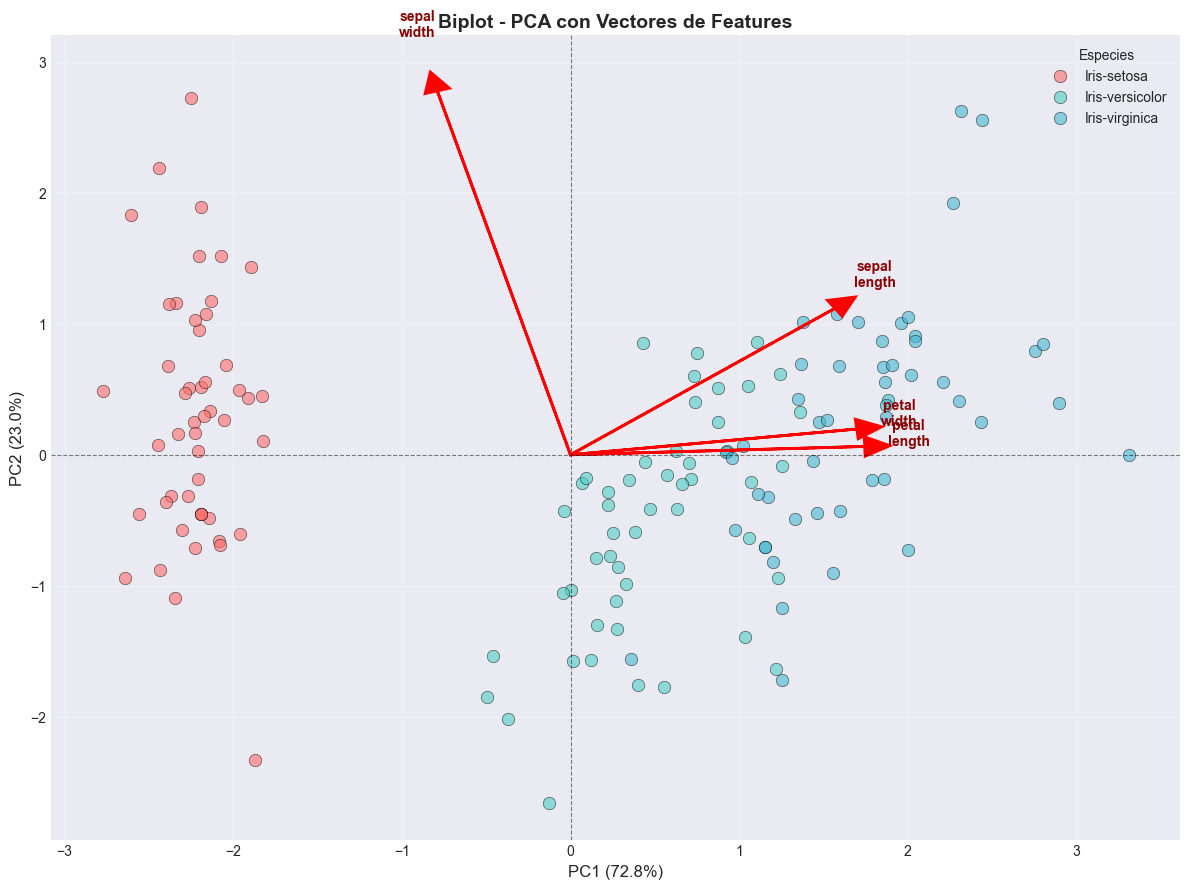

In [55]:
# 13. BIPLOT 
print("\n 13 Biplot - Features y Observaciones")

plt.figure(figsize=(12, 9))

# Plot de puntos
for species, color in zip(df['species'].unique(), colors_species):
    mask = y == species
    plt.scatter(X_pca_2d[mask, 0], X_pca_2d[mask, 1],
                c=color, label=species, alpha=0.6, 
                edgecolors='black', linewidth=0.5, s=80)

# Plot de vectores (loadings escalados)
scale_factor = 3
for i, feature in enumerate(features):
    plt.arrow(0, 0, 
              pca_2d.components_[0, i] * scale_factor,
              pca_2d.components_[1, i] * scale_factor,
              head_width=0.15, head_length=0.15, fc='red', ec='red', linewidth=2)
    plt.text(pca_2d.components_[0, i] * scale_factor * 1.15,
             pca_2d.components_[1, i] * scale_factor * 1.15,
             feature.replace('_', '\n'), fontsize=10, ha='center', 
             fontweight='bold', color='darkred')

plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)', fontsize=12)
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)', fontsize=12)
plt.title('Biplot - PCA con Vectores de Features', fontsize=14, fontweight='bold')
plt.legend(fontsize=10, title='Especies')
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.8, alpha=0.5)
plt.axvline(x=0, color='k', linestyle='--', linewidth=0.8, alpha=0.5)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [56]:
print("\n" + "=" * 60)
print("RESUMEN FINAL")

print(f"""
 ALGORITMO IMPLEMENTADO: PCA (Principal Component Analysis)

 REDUCCIÓN DIMENSIONAL:
   • Dimensiones originales: {X.shape[1]} features
   • Dimensiones reducidas: {n_components_optimo} componentes principales
   • Reducción: {X.shape[1]} → {n_components_optimo} ({(1 - n_components_optimo/X.shape[1])*100:.0f}% reducción)
   
 VARIANZA EXPLICADA:
   • PC1: {pca_2d.explained_variance_ratio_[0]*100:.2f}%
   • PC2: {pca_2d.explained_variance_ratio_[1]*100:.2f}%
   • Total (2D): {sum(pca_2d.explained_variance_ratio_)*100:.2f}%
   • Total (3D): {sum(pca_3d.explained_variance_ratio_)*100:.2f}%
   
 JUSTIFICACIÓN DE n_components={n_components_optimo}:
   1. Captura {sum(pca_2d.explained_variance_ratio_)*100:.2f}% de la varianza
   2. Permite visualización efectiva en 2D
   3. Balance óptimo entre reducción y preservación de información
   4. Pérdida de información aceptable: {(100 - sum(pca_2d.explained_variance_ratio_)*100):.2f}%
   5. Separación clara entre las 3 especies de Iris
   
 INTERPRETACIÓN DE COMPONENTES:
   PC1 (Principal): Captura la mayor variabilidad
   • Correlacionado con: {features[np.argmax(np.abs(pca_2d.components_[0]))]}
   
   PC2 (Secundario): Captura variabilidad ortogonal
   • Correlacionado con: {features[np.argmax(np.abs(pca_2d.components_[1]))]}
   
 CONCLUSIÓN:
   PCA reduce exitosamente las 4 dimensiones del dataset Iris a 2 dimensiones,
   preservando {sum(pca_2d.explained_variance_ratio_)*100:.1f}% de la varianza original. Esto permite
   visualización efectiva y separación clara de las 3 especies de flores.
   
 APLICACIONES:
   - Visualización de datos de alta dimensión
   - Reducción de ruido en los datos
   - Aceleración de algoritmos de ML
   - Detección de patrones y outliers
""")

print(" ANÁLISIS COMPLETADO EXITOSAMENTE")


RESUMEN FINAL

 ALGORITMO IMPLEMENTADO: PCA (Principal Component Analysis)

 REDUCCIÓN DIMENSIONAL:
   • Dimensiones originales: 4 features
   • Dimensiones reducidas: 2 componentes principales
   • Reducción: 4 → 2 (50% reducción)

 VARIANZA EXPLICADA:
   • PC1: 72.77%
   • PC2: 23.03%
   • Total (2D): 95.80%
   • Total (3D): 99.48%

 JUSTIFICACIÓN DE n_components=2:
   1. Captura 95.80% de la varianza
   2. Permite visualización efectiva en 2D
   3. Balance óptimo entre reducción y preservación de información
   4. Pérdida de información aceptable: 4.20%
   5. Separación clara entre las 3 especies de Iris

 INTERPRETACIÓN DE COMPONENTES:
   PC1 (Principal): Captura la mayor variabilidad
   • Correlacionado con: petal_length

   PC2 (Secundario): Captura variabilidad ortogonal
   • Correlacionado con: sepal_width

 ARCHIVOS GENERADOS PARA REPOSITORIO:
   • modelo_pca_2d_iris.pkl ← PCA con 2 componentes
   • modelo_pca_3d_iris.pkl ← PCA con 3 componentes
   • scaler_pca_iris.pkl ← Sta